In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
training_set = pd.read_csv("Training Set.csv")
training_label = pd.read_csv("Training Set Labels.csv")
data = pd.merge(training_set, training_label, how="left", on="id")

# Drop columns
#feature_list = ['longitude', 'latitude']
feature_list = ['id', 'longitude', 'latitude', 'gps_height']
data = data[feature_list]

print(data.shape)
data.head()

(59400, 4)


,id,longitude,latitude,gps_height
0,69572,34.938093,-9.856322,1390
1,8776,34.698766,-2.147466,1399
2,34310,37.460664,-3.821329,686
3,67743,38.486161,-11.155298,263
4,19728,31.130847,-1.825359,0


In [24]:
def find_centroid(longitude, latitude, centroids):
    closest = 0
    centroid = centroids[0]
    min_dis = (longitude - centroid[0])**2 + (latitude - centroid[1])**2
    for i in range(1, centroids.shape[0]):
        dis = (longitude - centroids[i][0])**2 + (latitude - centroids[i][1])**2
        if dis < min_dis:
            min_dis = dis
            closest = i
            centroid = centroids[i]
    return closest, centroid

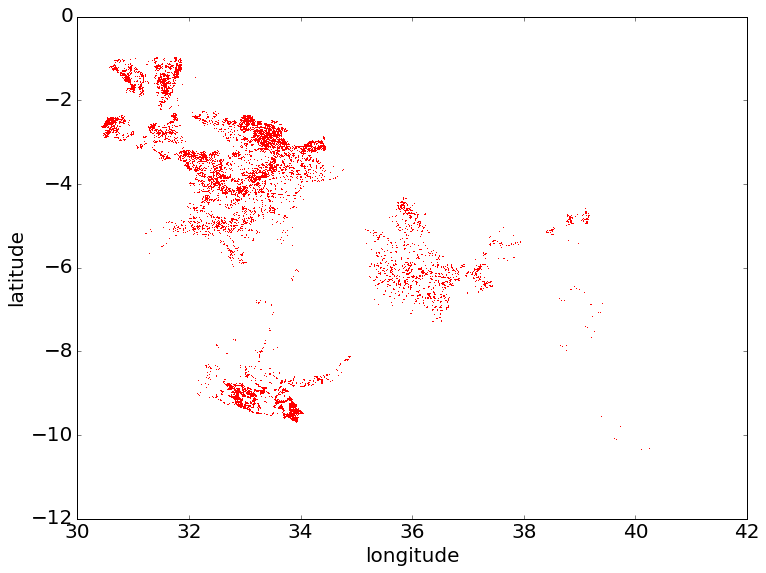

In [26]:
gps0 = data[(data['gps_height'] == 0) & (data['longitude'] != 0)]
fig = plt.figure(figsize=(12,9))
plt.plot(gps0['longitude'], gps0['latitude'], ',r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)
#plt.title('Location of wells with gps_height 0', fontsize=20)
plt.show()

In [28]:
# Create centroids which is a list of 2-element list
min_lng = gps0['longitude'].min()
max_lng = gps0['longitude'].max()
min_lat = gps0['latitude'].min()
max_lat = gps0['latitude'].max()

lng = np.linspace(min_lng, max_lng, 40)
lat = np.linspace(min_lat, max_lat, 40)

centroids = np.zeros((1600, 2))
for i in range(0, 1600):
    centroids[i][0] = lng[i//40]
    centroids[i][1] = lat[i%40]

In [29]:
location = gps0[['longitude', 'latitude']].as_matrix()
which_centroid = np.zeros(gps0.shape[0])
for i in range(0, gps0.shape[0]):
    which_centroid[i], dummy = find_centroid(location[i][0], location[i][1], centroids)
gps0['which_centroid'] = which_centroid

/Users/Fan/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
gps0.head()

,id,longitude,latitude,gps_height,which_centroid
4,19728,31.130847,-1.825359,0,156.0
5,9944,39.172796,-4.765587,0,1423.0
6,19816,33.362410,-3.766365,0,507.0
7,54551,32.620617,-4.226198,0,386.0
8,53934,32.711100,-5.146712,0,382.0


In [31]:
contain = set(which_centroid)

In [32]:
contain_points = np.zeros(1600)
for i in contain:
    contain_points[int(i)] = 1

metadata = pd.DataFrame(centroids, columns=['longitude', 'latitude'])
metadata['contain_points'] = contain_points

In [33]:
sub = metadata[metadata['contain_points'] == 1]

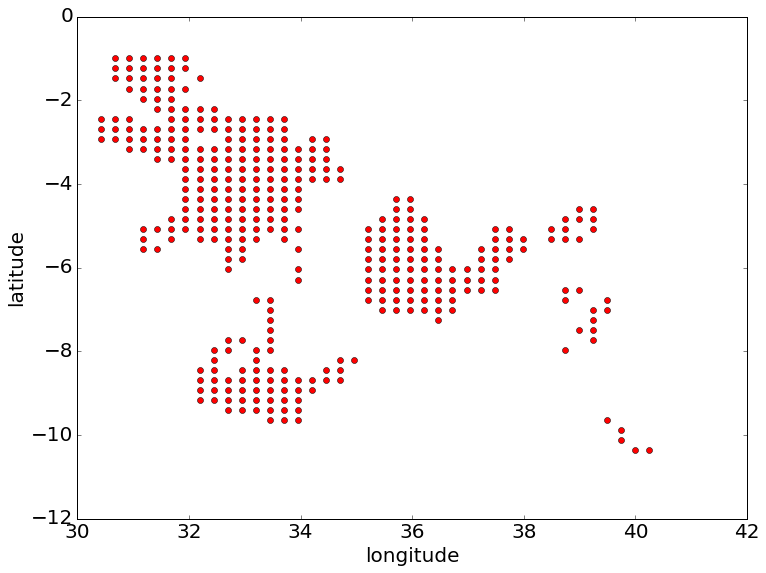

In [35]:
fig = plt.figure(figsize=(12,9))
plt.plot(sub['longitude'], sub['latitude'], 'or')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)
#plt.title('Location of wells with gps_height 0', fontsize=20)
plt.show()

In [28]:
sub[['longitude', 'latitude']].to_csv('gps height missing.csv')

In [3]:
elevation = pd.read_csv('elevation.csv', sep=';')
elevation.head()

,number,longitude,latitude,elevation
0,31,30.425215,-2.919986,1389.669556
1,32,30.425215,-2.679796,1426.274170
2,33,30.425215,-2.439606,1485.482056
3,71,30.677036,-2.919986,1535.855591
4,72,30.677036,-2.679796,1544.526001


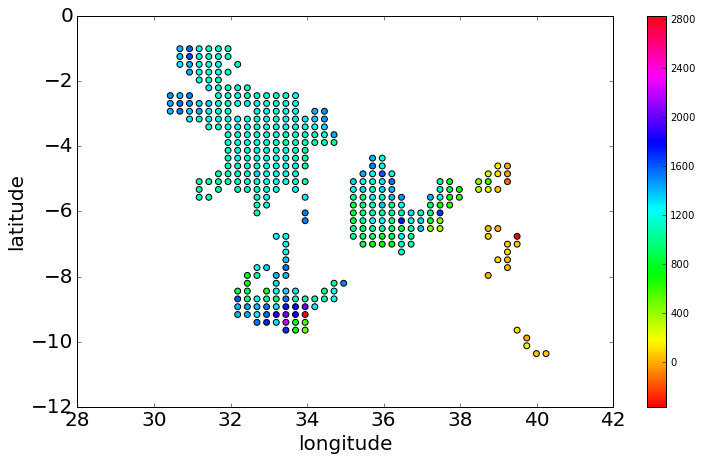

In [20]:
x = elevation['longitude']
y = elevation['latitude']
z = elevation['elevation']

fig = plt.figure(figsize=(12,7))
cm = plt.cm.get_cmap('hsv')
sc = plt.scatter(x, y, marker='o', c=z, vmin=z.min(), vmax=z.max(), s=35, cmap=cm)
plt.colorbar(sc)
#plt.ylim(y.min()-1, x.max()+1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.title('gps_height', fontsize=20)
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.show()

In [30]:
gps0['which_centroid'] = gps0['which_centroid'].astype(int)
gps0.columns = ['id', 'longitude', 'latitude', 'gps_height', 'number']
gps0.head()

KeyError: 'which_centroid'

In [32]:
elevation_data = pd.merge(gps0, elevation, how="left", on='number')
elevation_data = elevation_data[['id', 'longitude_x', 'latitude_x', 'gps_height', 'elevation']]
elevation_data.columns = ['id', 'longitude', 'latitude', 'gps_height', 'elevation']
elevation_data.head()

,id,longitude,latitude,gps_height,elevation
0,19728,31.130847,-1.825359,0,1232.186157
1,9944,39.172796,-4.765587,0,-18.006039
2,19816,33.362410,-3.766365,0,1074.282349
3,54551,32.620617,-4.226198,0,1198.038086
4,53934,32.711100,-5.146712,0,1164.176880


In [54]:
elevation_data['elevation'].describe()

count    18626.000000
mean      1209.825606
std        332.806391
min       -365.652222
25%       1130.222046
50%       1203.514160
75%       1320.997192
max       2826.381104
Name: elevation, dtype: float64

In [39]:
data = pd.read_csv("Training Set.csv")
print(data.shape)
data.head()

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [40]:
gps_data = pd.merge(data, elevation_data[['id', 'elevation']], how="left", on="id")

In [41]:
gps_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,elevation
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,NaN
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,NaN
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1232.186157


In [44]:
gps_data['elevation'].fillna(0, inplace=True)
gps_data['gps_height'] = gps_data['elevation'] + gps_data['gps_height']
gps_data.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,elevation
0,69572,6000.0,3/14/11,Roman,1390.000000,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0.000000
1,8776,0.0,3/6/13,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.000000
2,34310,25.0,2/25/13,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0.000000
3,67743,0.0,1/28/13,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.000000
4,19728,0.0,7/13/11,Action In A,1232.186157,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1232.186157
5,9944,20.0,3/13/11,Mkinga Distric Coun,-18.006039,DWE,39.172796,-4.765587,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,-18.006039
6,19816,0.0,10/1/12,Dwsp,1074.282349,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1074.282349
7,54551,0.0,10/9/12,Rwssp,1198.038086,DWE,32.620617,-4.226198,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1198.038086
8,53934,0.0,11/3/12,Wateraid,1164.176880,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,1164.176880
9,46144,0.0,8/3/11,Isingiro Ho,1373.930176,Artisan,30.626991,-1.257051,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1373.930176


In [47]:
gps_data.to_csv('gps_data.csv')

In [49]:
training_set = pd.read_csv("gps_data.csv")
training_label = pd.read_csv("Training Set Labels.csv")

data = pd.merge(training_set, training_label, how="left", on="id")
print(data.shape)
data.head(10)

(59400, 43)


,Unnamed: 0,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,elevation,status_group
0,0,69572,6000.0,3/14/11,Roman,1390.000000,Roman,34.938093,-9.856322,none,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0.000000,functional
1,1,8776,0.0,3/6/13,Grumeti,1399.000000,GRUMETI,34.698766,-2.147466,Zahanati,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0.000000,functional
2,2,34310,25.0,2/25/13,Lottery Club,686.000000,World vision,37.460664,-3.821329,Kwa Mahundi,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0.000000,functional
3,3,67743,0.0,1/28/13,Unicef,263.000000,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0.000000,non functional
4,4,19728,0.0,7/13/11,Action In A,1232.186157,Artisan,31.130847,-1.825359,Shuleni,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1232.186157,functional
5,5,9944,20.0,3/13/11,Mkinga Distric Coun,-18.006039,DWE,39.172796,-4.765587,Tajiri,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,-18.006039,functional
6,6,19816,0.0,10/1/12,Dwsp,1074.282349,DWSP,33.362410,-3.766365,Kwa Ngomho,...,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,1074.282349,non functional
7,7,54551,0.0,10/9/12,Rwssp,1198.038086,DWE,32.620617,-4.226198,Tushirikiane,...,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1198.038086,non functional
8,8,53934,0.0,11/3/12,Wateraid,1164.176880,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,...,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,1164.176880,non functional
9,9,46144,0.0,8/3/11,Isingiro Ho,1373.930176,Artisan,30.626991,-1.257051,Kwapeto,...,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1373.930176,functional


In [50]:
feature_list = ['date_recorded', 'population', 'amount_tsh', 'installer','longitude', 'latitude', 'basin', 'gps_height',
                'region', 'lga', 'extraction_type_group', 'extraction_type_class', 'construction_year', 
                'payment_type', 'water_quality', 'quantity', 'source_type', 'source_class', 'waterpoint_type', 
                'permit', 'status_group']

# if we are using random forest, we don't really need to deal with all the 0s in construction year

data = data[feature_list]

In [51]:
data.head(10)

,date_recorded,population,amount_tsh,installer,longitude,latitude,basin,gps_height,region,lga,...,extraction_type_class,construction_year,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,permit,status_group
0,3/14/11,109,6000.0,Roman,34.938093,-9.856322,Lake Nyasa,1390.000000,Iringa,Ludewa,...,gravity,1999,annually,soft,enough,spring,groundwater,communal standpipe,False,functional
1,3/6/13,280,0.0,GRUMETI,34.698766,-2.147466,Lake Victoria,1399.000000,Mara,Serengeti,...,gravity,2010,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,True,functional
2,2/25/13,250,25.0,World vision,37.460664,-3.821329,Pangani,686.000000,Manyara,Simanjiro,...,gravity,2009,per bucket,soft,enough,dam,surface,communal standpipe multiple,True,functional
3,1/28/13,58,0.0,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,263.000000,Mtwara,Nanyumbu,...,submersible,1986,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,True,non functional
4,7/13/11,0,0.0,Artisan,31.130847,-1.825359,Lake Victoria,1232.186157,Kagera,Karagwe,...,gravity,0,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,True,functional
5,3/13/11,1,20.0,DWE,39.172796,-4.765587,Pangani,-18.006039,Tanga,Mkinga,...,submersible,2009,per bucket,salty,enough,other,unknown,communal standpipe multiple,True,functional
6,10/1/12,0,0.0,DWSP,33.362410,-3.766365,Internal,1074.282349,Shinyanga,Shinyanga Rural,...,handpump,0,never pay,soft,enough,borehole,groundwater,hand pump,True,non functional
7,10/9/12,0,0.0,DWE,32.620617,-4.226198,Lake Tanganyika,1198.038086,Shinyanga,Kahama,...,handpump,0,unknown,milky,enough,shallow well,groundwater,hand pump,True,non functional
8,11/3/12,0,0.0,Water Aid,32.711100,-5.146712,Lake Tanganyika,1164.176880,Tabora,Tabora Urban,...,handpump,0,never pay,salty,seasonal,borehole,groundwater,hand pump,True,non functional
9,8/3/11,0,0.0,Artisan,30.626991,-1.257051,Lake Victoria,1373.930176,Kagera,Karagwe,...,handpump,0,never pay,soft,enough,shallow well,groundwater,hand pump,True,functional


(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          3.40000000e+01,   9.62000000e+02,   2.87400000e+03,
          8.30000000e+02,   7.27000000e+02,   5.35000000e+02,
          4.32000000e+02,   3.60000000e+02,   4.24000000e+02,
          4.47000000e+02,   7.63000000e+02,   1.16200000e+03,
          1.00300000e+03,   8.42000000e+02,   5.92000000e+02,
          4.63000000e+02,   5.60000000e+02,   7.16000000e+02,
          3.50000000e+02,   2.94000000e+02,   6.96000000e+02,
          1.66000000e+02,   1.48000000e+02,   2.43000000e+02,
          4.94000000e+02,   3.26000000e+02,   7.87000000e+02,
          4.51000000e+02,   4.17000000e+02,   3.73000000e+02,
          4.87000000e+02,   4.79000000e+02,   6.95000000e+02,
          8.97000000e+02,   7.07000000e+02,   1.11700000e+03,
          8.11000000e+02,   1.89700000e+03,   2.74700000e+03,
        

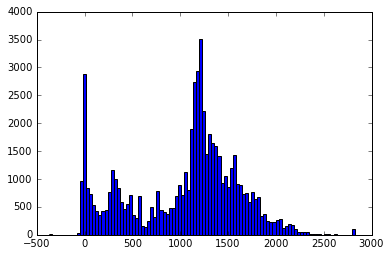

In [53]:
plt.hist(data['gps_height'], 100)